Simple example of using evolution strategies inside `es.py` for toy deterministic fitness function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES

In [2]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin

In [3]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 4000 # run each solver for 5000 generations.

In [4]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % 100 == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history

In [5]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(rastrigin(x))

This is F(0):
-10000.0


In [6]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print(rastrigin(x))
print("global optimum point:\n", x)

-0.0
global optimum point:
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]


In [7]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [8]:
ga_history = test_solver(ga)

fitness at iteration 100 -1036.18815391
fitness at iteration 200 -962.750929017
fitness at iteration 300 -962.750929017
fitness at iteration 400 -944.312541437
fitness at iteration 500 -909.933453992
fitness at iteration 600 -909.933453992
fitness at iteration 700 -893.492781374
fitness at iteration 800 -847.276394564
fitness at iteration 900 -822.530487601
fitness at iteration 1000 -816.068575727
fitness at iteration 1100 -757.914436607
fitness at iteration 1200 -756.743642405
fitness at iteration 1300 -737.194939136
fitness at iteration 1400 -669.635109981
fitness at iteration 1500 -597.651842377
fitness at iteration 1600 -556.100067028
fitness at iteration 1700 -490.610464966
fitness at iteration 1800 -430.32082922
fitness at iteration 1900 -402.994209632
fitness at iteration 2000 -357.754975554
fitness at iteration 2100 -302.977914347
fitness at iteration 2200 -282.218812242
fitness at iteration 2300 -238.905135777
fitness at iteration 2400 -214.9762161
fitness at iteration 2500 -2

In [9]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=294764, Fri Oct 27 22:06:15 2017)


In [10]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -1003.9909974159419
fitness at iteration 200 -802.8268305857051
fitness at iteration 300 -60.280708828513866
fitness at iteration 400 -53.73079723380158
fitness at iteration 500 -53.727776804587734
fitness at iteration 600 -53.72777397149821
fitness at iteration 700 -53.72777396958156
fitness at iteration 800 -53.72777396958077
fitness at iteration 900 -53.72777396958065
fitness at iteration 1000 -53.72777396958065
fitness at iteration 1100 -53.72777396958065
fitness at iteration 1200 -53.72777396958065
fitness at iteration 1300 -53.72777396958065
fitness at iteration 1400 -53.72777396958065
fitness at iteration 1500 -53.72777396958065
fitness at iteration 1600 -53.72777396958065
fitness at iteration 1700 -53.72777396958065
fitness at iteration 1800 -53.72777396958065
fitness at iteration 1900 -53.72777396958065
fitness at iteration 2000 -53.72777396958065
fitness at iteration 2100 -53.72777396958065
fitness at iteration 2200 -53.72777396958065
fitness at itera

In [11]:
# defines PEPG (NES) solver
pepg = PEPG(NPARAMS,                         # number of model parameters
            sigma_init=0.5,                  # initial standard deviation
            learning_rate=0.1,               # learning rate for standard deviation
            learning_rate_decay=1.0,       # don't anneal the learning rate
            popsize=NPOPULATION,             # population size
            average_baseline=False,          # set baseline to average of batch
            weight_decay=0.00,            # weight decay coefficient
            rank_fitness=False,           # use rank rather than fitness numbers
            forget_best=False)            # don't keep the historical best solution)

In [12]:
pepg_history = test_solver(pepg)

fitness at iteration 100 -3482.30049548
fitness at iteration 200 -1215.62711801
fitness at iteration 300 -1014.35553247
fitness at iteration 400 -840.840116567
fitness at iteration 500 -582.386649983
fitness at iteration 600 -509.385694731
fitness at iteration 700 -404.468334299
fitness at iteration 800 -313.573588111
fitness at iteration 900 -244.920559452
fitness at iteration 1000 -235.935310401
fitness at iteration 1100 -194.458783201
fitness at iteration 1200 -188.043949542
fitness at iteration 1300 -177.358212286
fitness at iteration 1400 -157.961122559
fitness at iteration 1500 -148.432787366
fitness at iteration 1600 -147.906864698
fitness at iteration 1700 -147.646836414
fitness at iteration 1800 -146.981120947
fitness at iteration 1900 -146.232726494
fitness at iteration 2000 -145.433034842
fitness at iteration 2100 -144.883851998
fitness at iteration 2200 -144.242868383
fitness at iteration 2300 -143.861838722
fitness at iteration 2400 -143.520472457
fitness at iteration 2500

In [13]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [14]:
oes_history = test_solver(oes)

fitness at iteration 100 -2641.27059538
fitness at iteration 200 -818.609194089
fitness at iteration 300 -791.422644092
fitness at iteration 400 -791.422644092
fitness at iteration 500 -791.422644092
fitness at iteration 600 -762.048343376
fitness at iteration 700 -699.670967536
fitness at iteration 800 -609.804677666
fitness at iteration 900 -604.206186473
fitness at iteration 1000 -509.130992244
fitness at iteration 1100 -464.057711998
fitness at iteration 1200 -434.564574858
fitness at iteration 1300 -387.78044898
fitness at iteration 1400 -357.665063099
fitness at iteration 1500 -326.799487921
fitness at iteration 1600 -278.820200448
fitness at iteration 1700 -278.820200448
fitness at iteration 1800 -262.555839987
fitness at iteration 1900 -250.11893072
fitness at iteration 2000 -228.462648917
fitness at iteration 2100 -213.853243918
fitness at iteration 2200 -213.853243918
fitness at iteration 2300 -203.000512951
fitness at iteration 2400 -203.000512951
fitness at iteration 2500 -

In [15]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
# this version turns on antithetic sampling. It doesn't really help, and sometimes hurts performance.
oes_antithetic = OpenES(NPARAMS,            # number of model parameters
                 sigma_init=0.5,            # initial standard deviation
                 sigma_decay=0.999,         # don't anneal standard deviation
                 learning_rate=0.1,         # learning rate for standard deviation
                 learning_rate_decay=1.0,   # annealing the learning rate
                 popsize=NPOPULATION+1,     # population size
                 antithetic=True,           # whether to use antithetic sampling
                 weight_decay=0.00,         # weight decay coefficient
                 rank_fitness=False,        # use rank rather than fitness numbers
                 forget_best=False)

In [16]:
oes_antithetic_history = test_solver(oes_antithetic)

fitness at iteration 100 -3284.87173078
fitness at iteration 200 -923.715344616
fitness at iteration 300 -797.335204693
fitness at iteration 400 -797.335204693
fitness at iteration 500 -773.155002288
fitness at iteration 600 -743.395082871
fitness at iteration 700 -645.367987242
fitness at iteration 800 -610.398261611
fitness at iteration 900 -560.774520676
fitness at iteration 1000 -471.082353647
fitness at iteration 1100 -442.845407864
fitness at iteration 1200 -419.21140859
fitness at iteration 1300 -355.097294683
fitness at iteration 1400 -333.788721141
fitness at iteration 1500 -317.233882565
fitness at iteration 1600 -287.983445233
fitness at iteration 1700 -245.24420211
fitness at iteration 1800 -224.091432669
fitness at iteration 1900 -224.091432669
fitness at iteration 2000 -209.192447219
fitness at iteration 2100 -209.192447219
fitness at iteration 2200 -209.192447219
fitness at iteration 2300 -209.192447219
fitness at iteration 2400 -209.192447219
fitness at iteration 2500 -

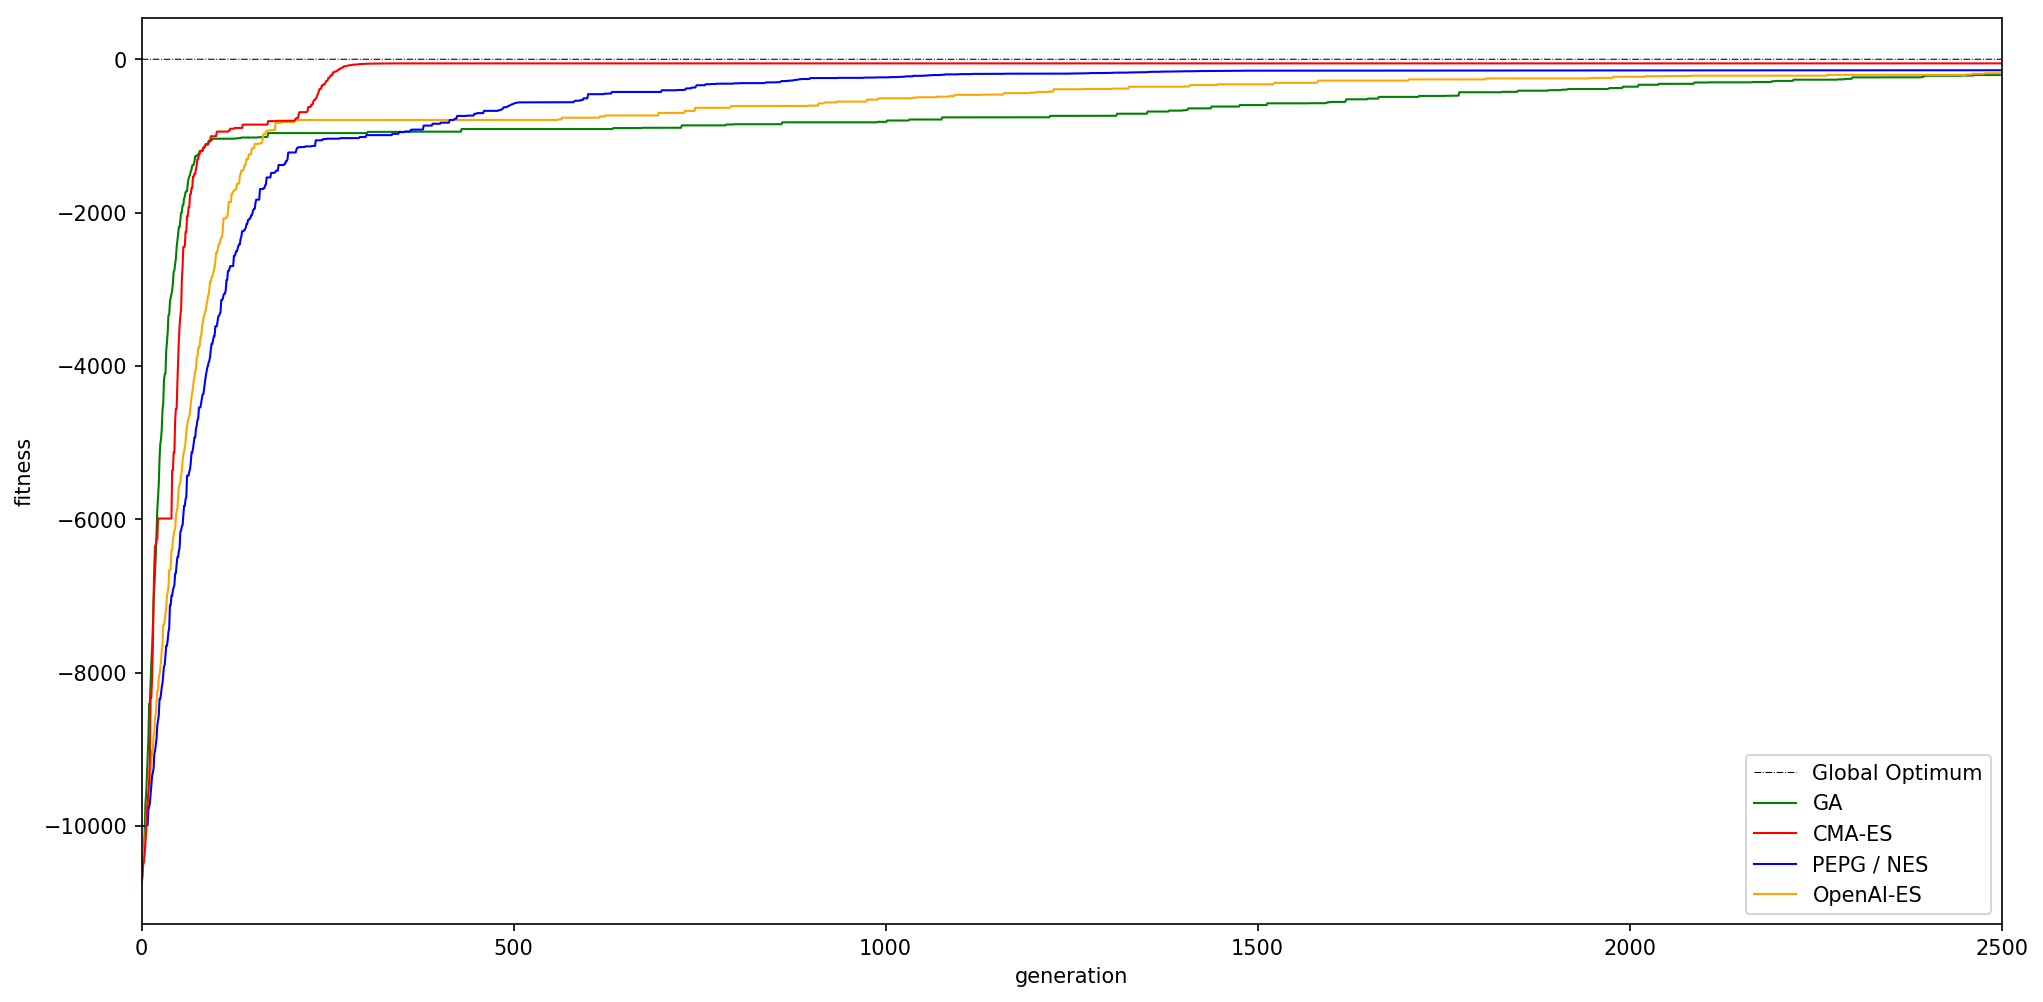

In [28]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(16,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')

plt.legend(handles=[optimum_line, ga_line, cma_line, pepg_line, oes_line], loc=4)

# Set x limits
plt.xlim(0,2500)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()